<h1>Histogram and Intensity Transformations</h1>


Estimated time needed: **40** minutes


<h2>Objectives</h2>


Pixel Transforms are operations you perform one pixel at a time. In this lab, you will start by creating histograms. Histograms display the intensity of the image and can be used to optimize image characteristics. You will then apply Intensity Transformations, making objects easier to see by improving image contrast and brightness. In the last portion of the lab, you will use thresholding to segment objects from images.


<ul>
    <li><a href='#PT'>Pixel Transforms  </a>
        <ul>
            <li>Histograms </li>
            <li>Intensity Transformations</li>
            <li>Thresholding and Simple Segmentation </li>   
</ul>


----


Download the image for the lab


In [91]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/goldhill.bmp -O goldhill.bmp
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg -O cameraman.jpeg
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/zelda.png -O zelda.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/mammogram.png -O mammogram.png

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


We will be using these imported functions in the lab


In [ ]:
import matplotlib.pyplot as plt  # import thư viện matplotlib để vẽ và hiển thị ảnh
import cv2  # import thư viện opencv để xử lý ảnh
import numpy as np  # import thư viện numpy để xử lý mảng số


First, lets define a helper function to plot two images side-by-side. You will not need to understand this code at this moment, but this function will be used repeatedly in this tutorial to showcase the results. 


In [ ]:
def plot_image(image_1, image_2, title_1="Orignal", title_2="New Image"):  # hàm hiển thị 2 ảnh
    plt.figure(figsize=(10,10))  # tạo khung hình lớn
    plt.subplot(1, 2, 1)  # chia khung thành 1 hàng 2 cột, chọn ô 1
    plt.imshow(image_1, cmap="gray")  # hiển thị ảnh thứ nhất
    plt.title(title_1)  # đặt tiêu đề ảnh 1
    plt.subplot(1, 2, 2)  # chọn ô thứ 2
    plt.imshow(image_2, cmap="gray")  # hiển thị ảnh thứ hai
    plt.title(title_2)  # đặt tiêu đề ảnh 2
    plt.show()  # hiển thị kết quả

Lets define another helper function. The following one will plot two histograms side-by-side. Again, you do not need to understand the body of this function at this moment.


In [ ]:
def plot_hist(old_image, new_image, title_old="Orignal", title_new="New Image"):  # hàm vẽ histogram 2 ảnh
    intensity_values = np.array([x for x in range(256)])  # tạo mảng giá trị cường độ từ 0 đến 255
    plt.subplot(1, 2, 1)  # chia khung thành 1 hàng 2 cột, chọn ô 1
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0], width=5)  # vẽ histogram ảnh gốc
    plt.title(title_old)  # đặt tiêu đề ảnh gốc
    plt.xlabel('intensity')  # đặt nhãn trục x
    plt.subplot(1, 2, 2)  # chọn ô thứ 2
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0], width=5)  # vẽ histogram ảnh mới
    plt.title(title_new)  # đặt tiêu đề ảnh mới
    plt.xlabel('intensity')  # đặt nhãn trục x
    plt.show()  # hiển thị kết quả

# Histograms  


A histogram counts the number of occurrences of the intensity values of pixels, and it's a useful tool for understanding and manipulating images. We use <code>cv.calcHist()</code> to generate the histogram. Here are the parameter values:
<p>
    <code>cv2.calcHist(CV array:<b>[image]</b> this is the image channel:<b>[0]</b>,for this course it will always be <b>[None]</b>,the number of bins:<b>[L]</b>,the range of index of bins:<b>[0,L-1]</b>) </code>   
</p>
For real images, <code>L</code> is <code>256</code>.


## Toy Example


Consider the toy array with intensity values ranging from 0 to 2. We can create a histogram. Its first element is the number of zeros in the image (in this case, 1); its second element is the number of ones in the image (in this case, 5), and so on.


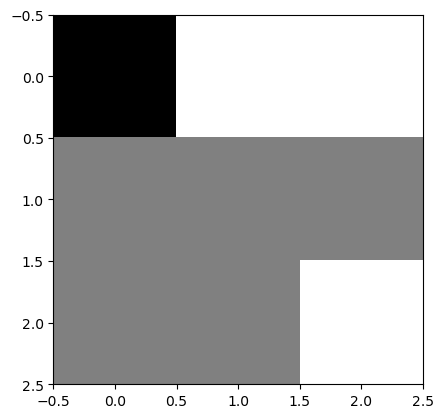

toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [ ]:
toy_image = np.array([[0,2,2],[1,1,1],[1,1,2]], dtype=np.uint8)  # tạo ảnh ma trận 3x3 kiểu uint8
plt.imshow(toy_image, cmap="gray")  # hiển thị ảnh dưới dạng grayscale
plt.show()  # hiển thị ra màn hình
print("toy_image:", toy_image)  # in giá trị ma trận ảnh

We can use the <code>caclHist</code> function, in this case, we use only three bins as there are only three values, and the index of the bins are from 1 to 3.

**TODO:** @Joe 


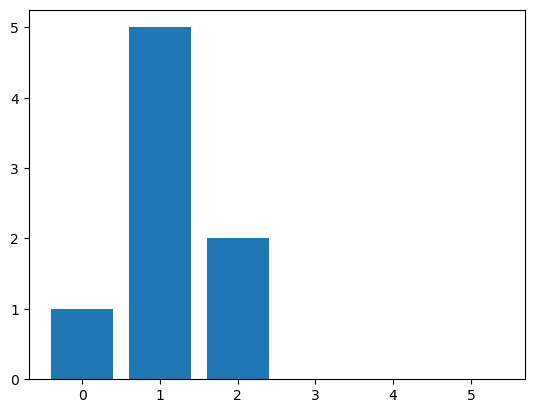

In [ ]:
plt.bar([x for x in range(6)], [1,5,2,0,0,0])  # vẽ biểu đồ cột với trục x từ 0 đến 5
plt.show()  # hiển thị biểu đồ

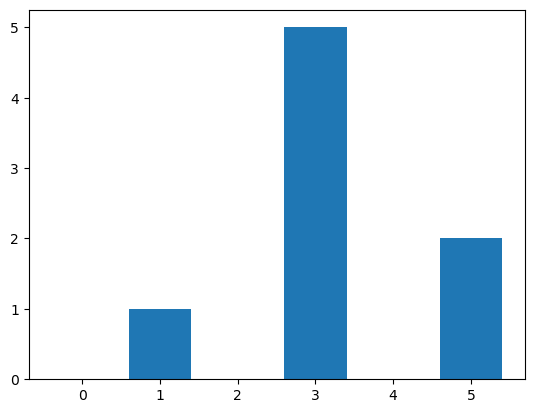

In [ ]:
plt.bar([x for x in range(6)], [0,1,0,5,0,2])  # vẽ biểu đồ cột với trục x từ 0 đến 5
plt.show()  # hiển thị biểu đồ

The histogram is a function where $h[r]$  where   $r \in {0,1,2} $. In the above example  $h[0]=1$,$h[1]=5$ and $h[2]=3$


## Gray Scale Histograms 




Histograms are used in grayscale images.  Grayscale images are used in many applications, including medical and industrial. Color images are split into luminance and chrominance. The luminance is the grayscale portion and is usually processed in many applications. Consider the following "Gold Hill" image:


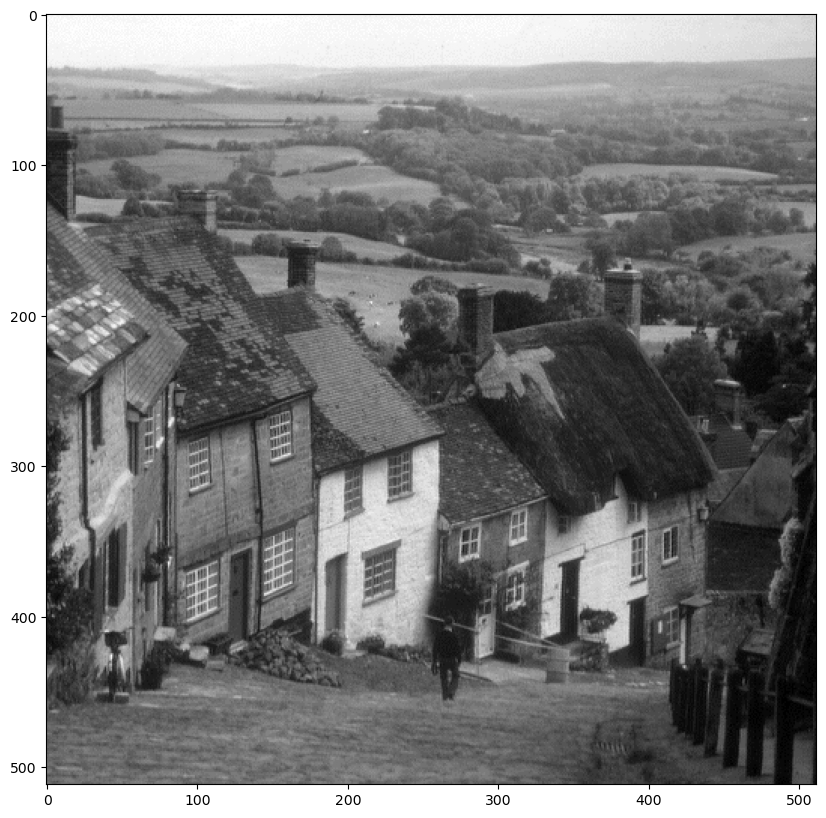

In [ ]:
goldhill = cv2.imread("goldhill.bmp", cv2.IMREAD_GRAYSCALE)  # đọc ảnh grayscale từ file
plt.figure(figsize=(10,10))  # tạo khung hiển thị lớn
plt.imshow(goldhill, cmap="gray")  # hiển thị ảnh dạng xám
plt.show()  # hiển thị kết quả

We can calculate the histogram using the `calcHist` function from the `cv2` module as follows, the shape is 256.


In [ ]:
hist = cv2.calcHist([goldhill], [0], None, [256], [0,256])  # tính histogram của ảnh grayscale với 256 mức xám

We can plot it as a bar graph, the $x$-axis are the pixel intensities and the $y$-axis is the number of times of occurrences that the corresponding pixel intensity value on $x$-axis occurred.


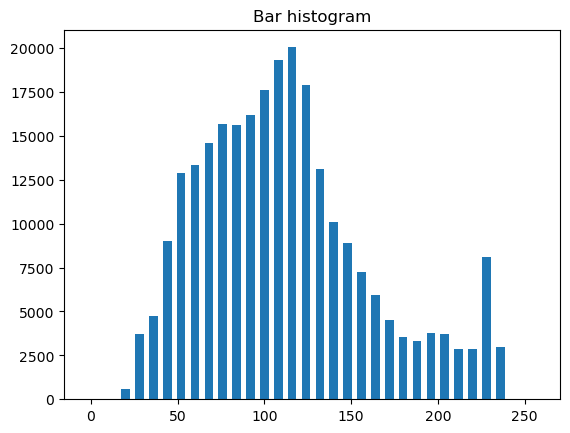

In [ ]:
intensity_values = np.array([x for x in range(hist.shape[0])])  # tạo mảng giá trị cường độ từ 0 đến số mức xám
plt.bar(intensity_values, hist[:,0], width=5)  # vẽ biểu đồ cột histogram
plt.title("Bar histogram")  # đặt tiêu đề biểu đồ
plt.show()  # hiển thị kết quả

The histogram is a function where $h[r]$  where   $r \in {0,1,..,255} $.


We can convert it to a probability mass function by normalizing it by the number of pixels:


In [ ]:
PMF = hist / (goldhill.shape[0] * goldhill.shape[1])  # chuẩn hóa histogram thành phân phối xác suất PMF

We can plot as a continuous function:


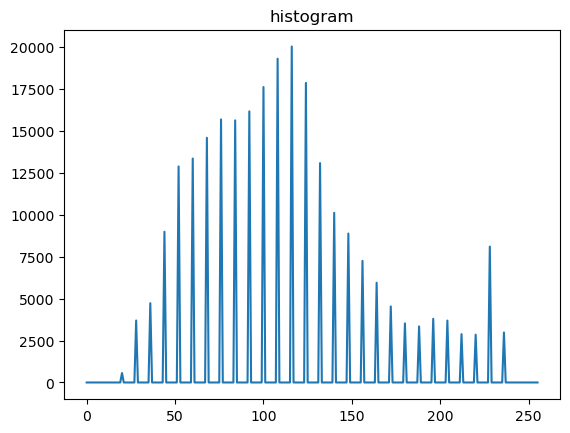

In [ ]:
plt.plot(intensity_values, hist)  # vẽ histogram dạng đường
plt.title("histogram")  # đặt tiêu đề biểu đồ
plt.show()  # hiển thị kết quả


We can also apply a histogram to each image color channel:


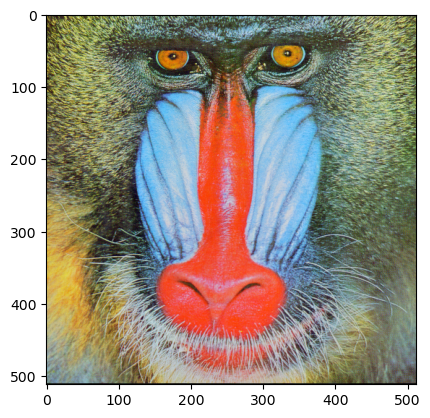

In [ ]:
baboon = cv2.imread("baboon.png")  # đọc ảnh từ file
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))  # chuyển BGR sang RGB và hiển thị ảnh
plt.show()  # hiển thị kết quả

In the loop, the value for <code>i</code> specifies what color channel <code>calcHist</code> is going to calculate the histogram for.   


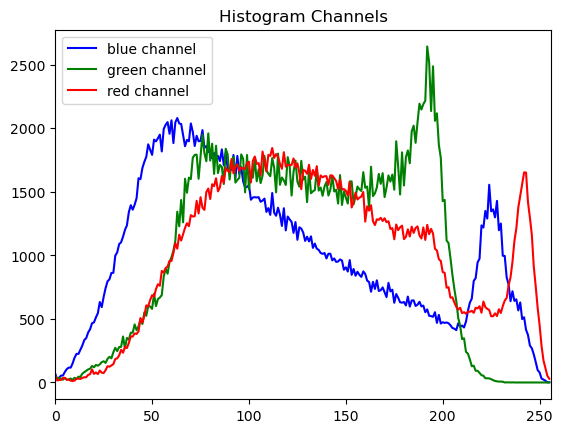

In [ ]:
color = ('blue','green','red')  # danh sách màu tương ứng các kênh BGR
for i, col in enumerate(color):  # duyệt từng kênh màu
    histr = cv2.calcHist([baboon], [i], None, [256], [0,256])  # tính histogram cho từng kênh
    plt.plot(intensity_values, histr, color=col, label=col+" channel")  # vẽ histogram từng kênh
    
    plt.xlim([0,256])  # giới hạn trục x từ 0 đến 255
plt.legend()  # hiển thị chú thích
plt.title("Histogram Channels")  # đặt tiêu đề biểu đồ
plt.show()  # hiển thị kết quả

#  Intensity Transformations


It's helpful to think of an image as a function $f(x,y)$ instead of an array at this point, where `x` is the row index and `y` is the column index. You can apply a transformation $T$ to the image and get a new image: 
$$
g(x,y)=T(f(x,y))
$$

An Intensity Transformation depends on only one single point $(x,y)$. For example, you can apply a linear transform $g(x,y) = 2f(x,y) + 1$; this will multiply each image pixel by two and add one.

As the Intensity transforms only depend on one value; as a result, it is sometimes referred to as a gray-level mapping. The variable if $r$ is the gray level intensity, similar to the histogram values. The new output s is given by:

$$
s=T(r)
$$


## Image Negatives


Consider an image with $L$ intensity values ranging from $[0,L-1]$.  We can reverse the intensity levels by applying the following:
$$
g(x,y)=L-1-f(x,y)
$$

Using the intensity transformation function notation 
$$
s = L - 1 - r
$$

This is called the image negative. For $L= 256$ the formulas simplifys to:
$$
g(x,y)=255-f(x,y) \qquad \text{and} \qquad s=255-r
$$


We can perform intensity transformation on the toy image where $L = 3$:


In [ ]:
#neg_toy_image = -1 * toy_image + 255  # công thức đảo mức xám nhưng dễ bị tràn số
neg_toy_image = -1 * toy_image.astype('int16') + 255  # chuyển sang int16 để tránh tràn số khi tính toán
neg_toy_image = neg_toy_image.astype('uint8')  # chuyển lại về uint8 sau khi tính toán

print("toy image\n", neg_toy_image)  # in ảnh toy sau khi đảo mức xám
print("image negatives\n", neg_toy_image)  # in ảnh negative

toy image
 [[255 253 253]
 [254 254 254]
 [254 254 253]]
image negatives
 [[255 253 253]
 [254 254 254]
 [254 254 253]]


We see darker intensity’s become brighter and brighter become darker, middle intensity’s remain the same.


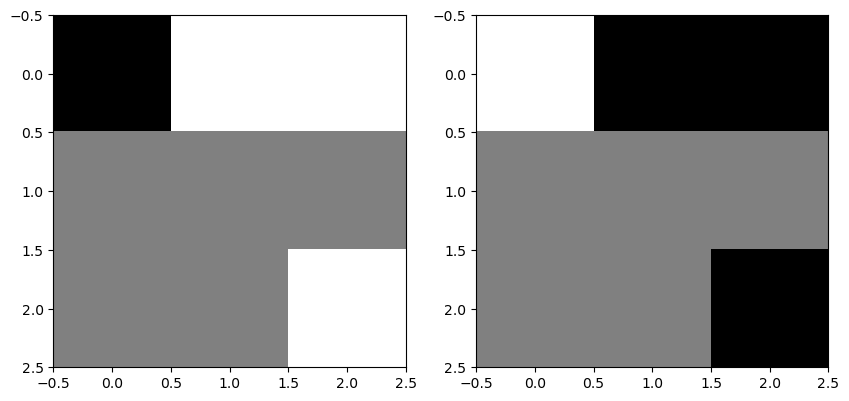

toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [ ]:
plt.figure(figsize=(10,10))  # tạo khung hình lớn
plt.subplot(1, 2, 1)  # chia khung thành 1 hàng 2 cột, chọn ô 1
plt.imshow(toy_image, cmap="gray")  # hiển thị ảnh gốc
plt.subplot(1, 2, 2)  # chọn ô thứ 2
plt.imshow(neg_toy_image, cmap="gray")  # hiển thị ảnh negative
plt.show()  # hiển thị kết quả
print("toy_image:", toy_image)  # in ma trận ảnh gốc

Reversing image intensity has many applications, including making it simpler to analyze medical images. Consider the mammogram with micro-calcifications on the upper quadrant:


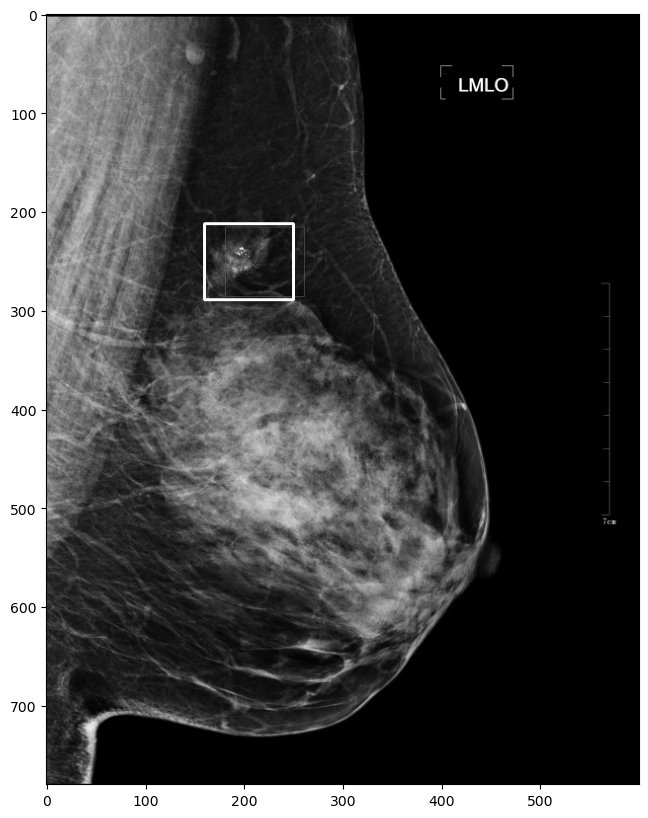

In [ ]:
image = cv2.imread("mammogram.png", cv2.IMREAD_GRAYSCALE)  # đọc ảnh grayscale từ file
cv2.rectangle(image, pt1=(160, 212), pt2=(250, 289), color=(255), thickness=2)  # vẽ hình chữ nhật lên ảnh

plt.figure(figsize=(10,10))  # tạo khung hiển thị lớn
plt.imshow(image, cmap="gray")  # hiển thị ảnh dạng xám
plt.show()  # hiển thị kết quả

We can apply the intensity transformation:


In [ ]:
#img_neg = -1 * image + 255  # công thức đảo mức xám nhưng dễ bị tràn số
img_neg = -1 * image.astype('int16') + 255  # chuyển sang int16 để tránh tràn số khi tính toán
img_neg = img_neg.astype('uint8')  # chuyển lại về uint8 sau khi tính toán

We see the micro-calcifications in the image negatives is easier it is to analyze:


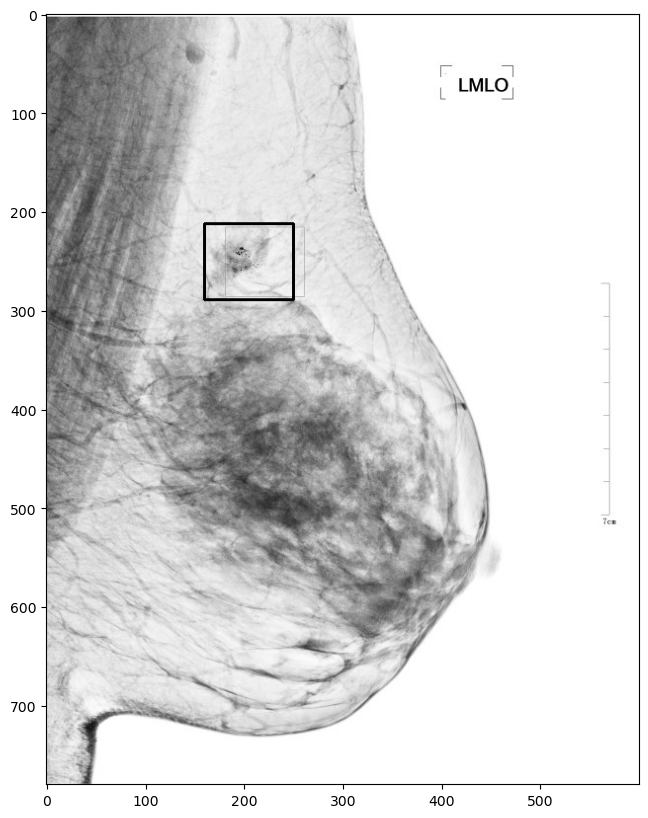

In [ ]:
plt.figure(figsize=(10,10))  # tạo khung hiển thị lớn
plt.imshow(img_neg, cmap="gray")  # hiển thị ảnh negative dạng xám
plt.show()  # hiển thị kết quả

## Brightness and contrast adjustments


We can use multiplication by $\alpha$ for contrast control and addition by $\beta$ to improve brightness control. This applies the Intensity Transformation as well. The image is $f(x,y)$ and the transformed image is $g(x,y)$, where $g(x,y) = \alpha f(x,y) + \beta$.


 Rather than implementing via array operations, we use the function  <code>convertScaleAbs</code>. It scales, calculates absolute values, and converts the result to 8-bit so the values fall between $[0,255]$. For brightness control, we can set $\alpha$ to 1 and $\beta$ to 100: Remember the Good Hill image, it’s dark and hazy so let's see if we can improve it. 


In [ ]:
alpha = 1 # Simple contrast control
beta =  100  # Simple brightness control   
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta) # áp dụng tăng sáng và tương phản cho ảnh

We can plot the brighter image, it's much brighter :


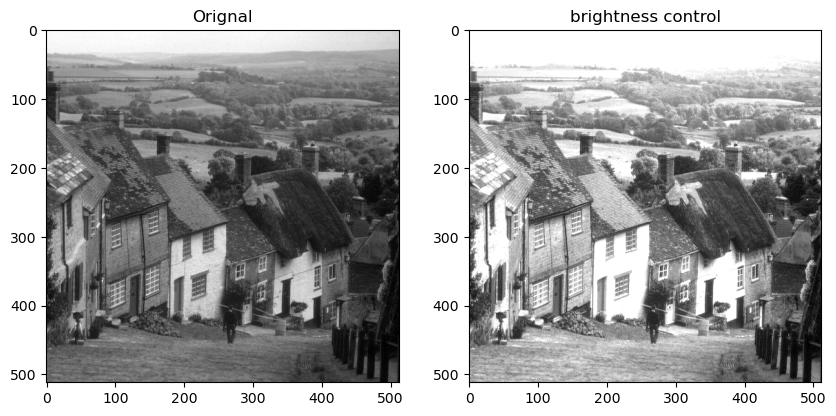

In [ ]:
plot_image(goldhill, new_image, title_1="Orignal", title_2="brightness control")  # hiển thị ảnh gốc và ảnh sau khi tăng sáng

We see the brighter image's histogram is shifted:     


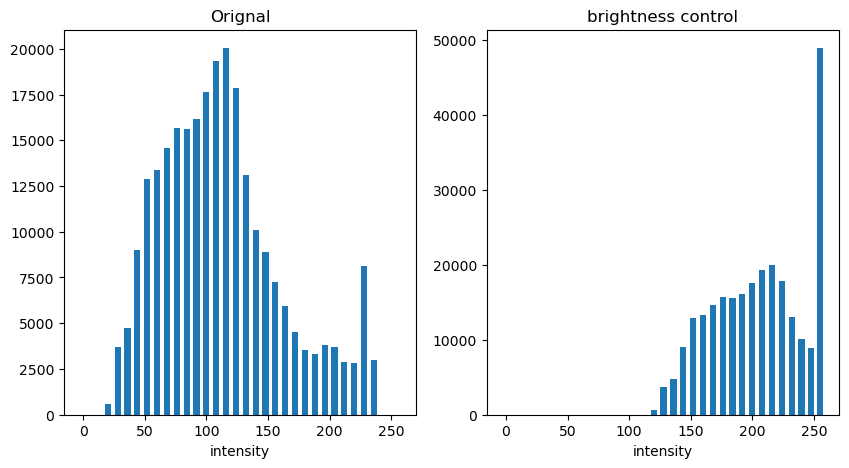

In [ ]:
plt.figure(figsize=(10,5))  # tạo khung hiển thị histogram
plot_hist(goldhill, new_image, "Orignal", "brightness control")  # vẽ histogram ảnh gốc và ảnh sau khi tăng

We can increase the contrast by increasing $\alpha$:


In [ ]:
plt.figure(figsize=(10,5)) # tạo khung hiển thị
alpha = 2# Simple contrast control
beta = 0 # Simple brightness control   # Simple brightness control
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta) # áp dụng tăng tương phản cho ảnh

<Figure size 1000x500 with 0 Axes>

We can plot the image and its corresponding histogram:


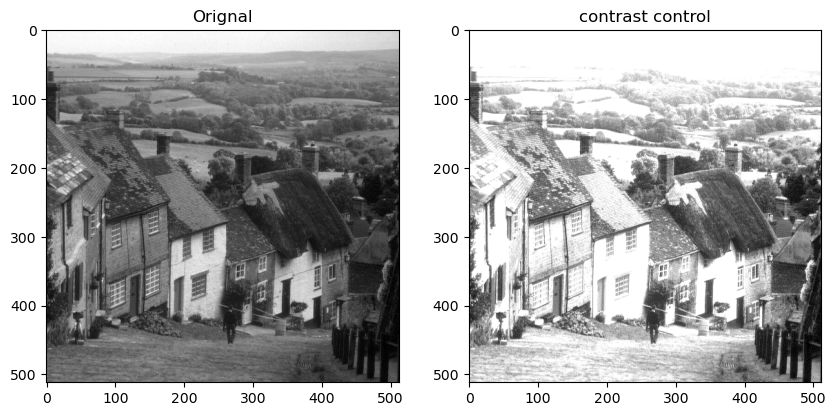

In [ ]:
plot_image(goldhill, new_image, "Orignal", "contrast control")  # hiển thị ảnh gốc và ảnh sau khi tăng tương phản

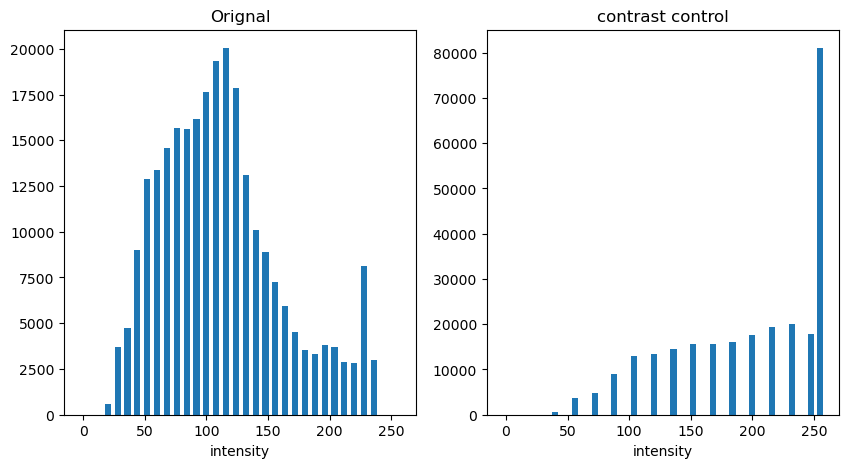

In [ ]:
plt.figure(figsize=(10,5))  # tạo khung hiển thị histogram
plot_hist(goldhill, new_image, "Orignal", "contrast control")  # vẽ histogram ảnh gốc và ảnh sau khi tăng tương phản

When plotting the image we see it's too bright. We can adapt the brightness by making the image darker and increasing the contrast at the same time. 


In [ ]:
plt.figure(figsize=(10,5)) # tạo khung hiển thị
alpha = 3 # Simple contrast control
beta = -200  # Simple brightness control   
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta) # vẽ histogram ảnh gốc và ảnh sau khi tăng tương phản

<Figure size 1000x500 with 0 Axes>

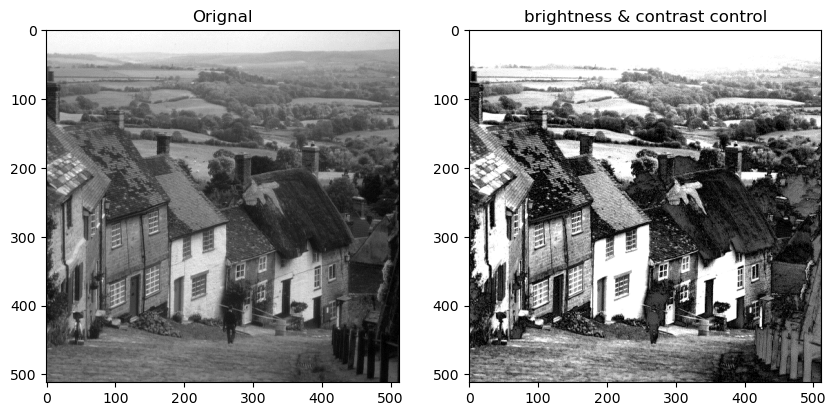

In [ ]:
plot_image(goldhill, new_image, "Orignal", "brightness & contrast control")  # hiển thị ảnh gốc và ảnh sau khi điều chỉnh sáng và tương phản

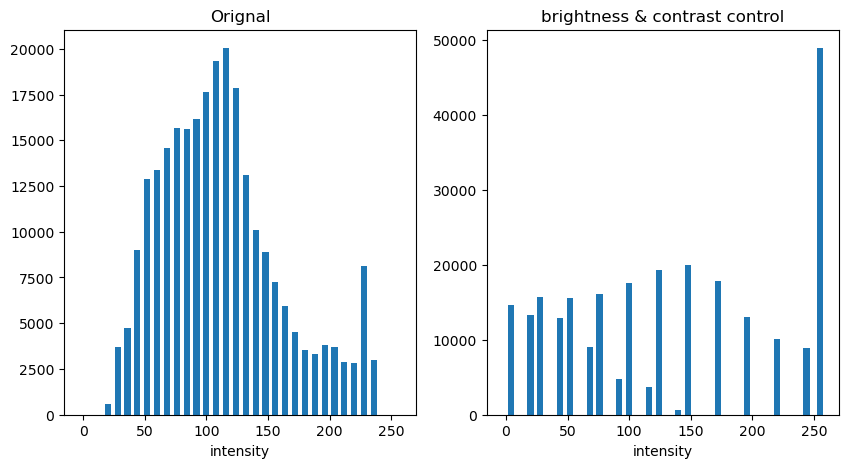

In [ ]:
plt.figure(figsize=(10,5))  # tạo khung hiển thị histogram
plot_hist(goldhill, new_image, "Orignal", "brightness & contrast control")  # vẽ histogram ảnh gốc và ảnh sau khi điều chỉnh sáng và tương phản

There are other nonlinear methods to improve contrast and brightness, these methods have different sets of parameters. In general, it’s difficult to manually adjust the contrast and brightness parameter, but there are algorithms that improve contrast automatically.


## Histogram Equalization


Histogram Equalization increases the contrast of images, by stretching out the range of the grayscale pixels; It does this by flatting  the histogram. We simply apply the function <code>cv2.equalizeHist</code>.


In [ ]:
zelda = cv2.imread("zelda.png", cv2.IMREAD_GRAYSCALE)  # đọc ảnh grayscale từ file
new_image = cv2.equalizeHist(zelda)  # cân bằng histogram cho ảnh
#new_image = new_image.astype('uint8')  # chuyển kiểu dữ liệu về uint8 nếu cần

We can compare the image before and after Histogram Equalization, we see the contrast is improved. We see after the Histogram Equalization is applied, the histogram is stretched out:


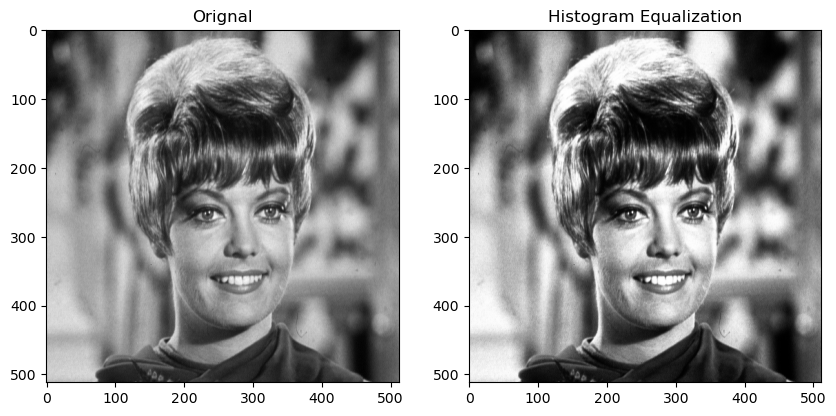

In [ ]:
plot_image(zelda, new_image, "Orignal", "Histogram Equalization")  # hiển thị ảnh gốc và ảnh sau khi cân bằng histogram

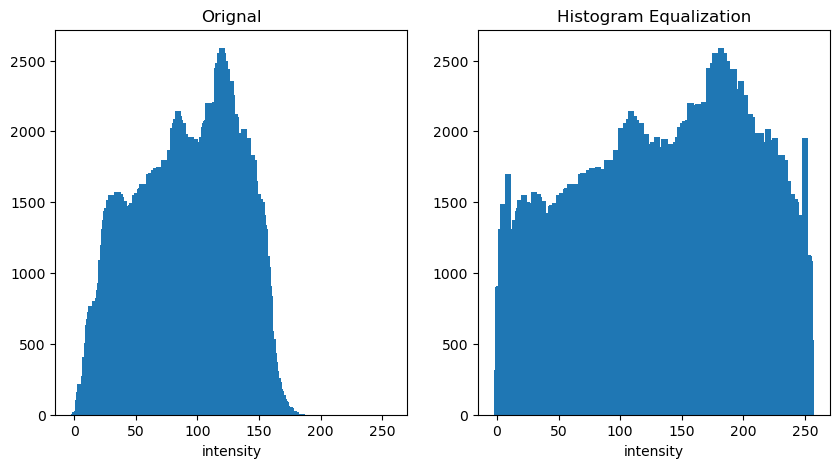

In [ ]:
plt.figure(figsize=(10,5))  # tạo khung hiển thị histogram
plot_hist(zelda, new_image, "Orignal", "Histogram Equalization")  # vẽ histogram ảnh gốc và ảnh sau khi cân bằng histogram

## Thresholding and Simple Segmentation 


Thresholding is used in image segmentation this means extracting objects from an image. Image segmentation is used in many applications including extracting text, medical imaging, and industrial imaging.
Thresholding an image takes a threshold; If a particular pixel (i,j) is greater than that threshold it will set that pixel to some value usually 1 or 255, otherwise, it will set it to another value, usually zero. We can write a Python function that will perform thresholding and output a new image given some input grayscale image:


In [ ]:
def thresholding(input_img, threshold, max_value=255, min_value=0):  # hàm thực hiện thresholding ảnh
    N, M = input_img.shape  # lấy số hàng và cột của ảnh
    image_out = np.zeros((N, M), dtype=np.uint8)  # tạo ảnh đầu ra toàn giá trị 0
        
    for i in range(N):  # duyệt từng hàng
        for j in range(M):  # duyệt từng cột
            if input_img[i, j] > threshold:  # nếu giá trị pixel lớn hơn ngưỡng
                image_out[i, j] = max_value  # gán giá trị tối đa
            else:  # nếu nhỏ hơn hoặc bằng ngưỡng
                image_out[i, j] = min_value  # gán giá trị tối thiểu
                
    return image_out  # trả về ảnh sau khi thresholding

Consider the following toy image:


In [ ]:
toy_image  # biến lưu ảnh dạng ma trận numpy

array([[0, 2, 2],
       [1, 1, 1],
       [1, 1, 2]], dtype=uint8)

We can apply thresholding, by setting all the values less than two to zero. 


In [ ]:
threshold = 1  # giá trị ngưỡng threshold
max_value = 2  # giá trị gán khi pixel lớn hơn ngưỡng
min_value = 0  # giá trị gán khi pixel nhỏ hơn hoặc bằng ngưỡng
thresholding_toy = thresholding(toy_image, threshold=threshold, max_value=max_value, min_value=min_value)  # áp dụng thresholding cho toy_image
thresholding_toy  # hiển thị kết quả thresholding

array([[0, 2, 2],
       [0, 0, 0],
       [0, 0, 2]], dtype=uint8)

We can compare the two images. In the new image we see all the gray values are now black:


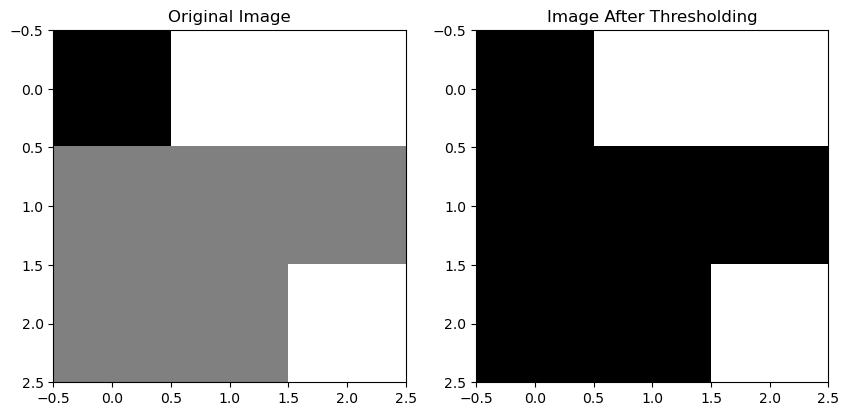

In [ ]:
plt.figure(figsize=(10, 10))  # tạo khung hiển thị lớn
plt.subplot(1, 2, 1)  # chia khung thành 1 hàng 2 cột, chọn ô 1
plt.imshow(toy_image, cmap="gray")  # hiển thị ảnh gốc
plt.title("Original Image")  # đặt tiêu đề ảnh gốc
plt.subplot(1, 2, 2)  # chọn ô thứ 2
plt.imshow(thresholding_toy, cmap="gray")  # hiển thị ảnh sau thresholding
plt.title("Image After Thresholding")  # đặt tiêu đề ảnh sau xử lý
plt.show()  # hiển thị kết quả

Consider the cameraman image:


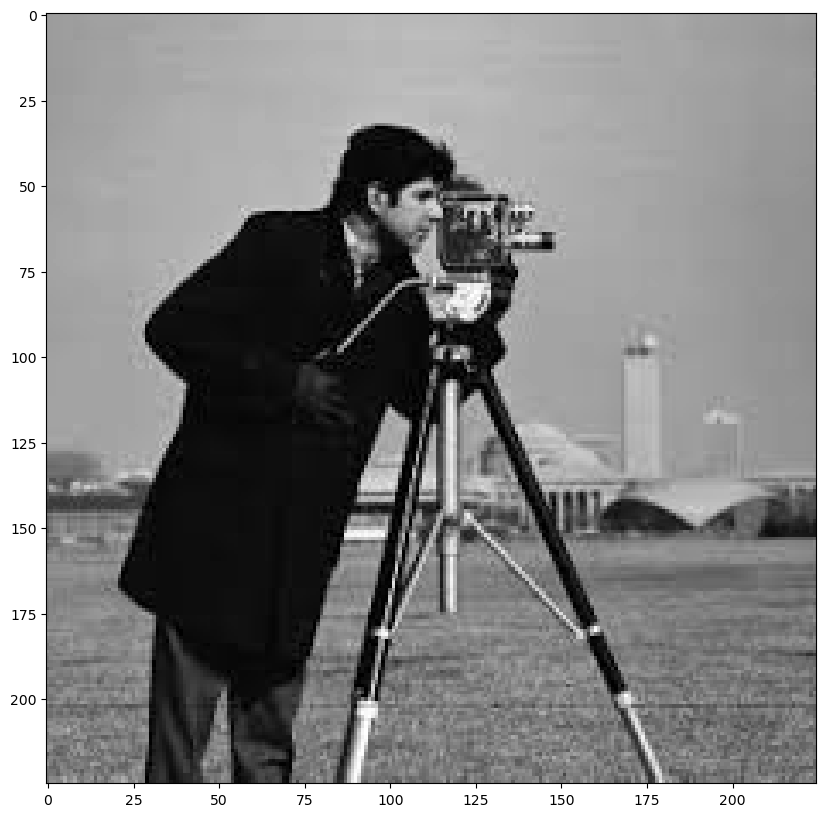

In [ ]:
image = cv2.imread("cameraman.jpeg", cv2.IMREAD_GRAYSCALE)  # đọc ảnh grayscale từ file
plt.figure(figsize=(10, 10))  # tạo khung hiển thị lớn
plt.imshow(image, cmap="gray")  # hiển thị ảnh dạng xám
plt.show()  # hiển thị kết quả

We can see the histogram as two peeks, this means that there is a large proportion of pixels in those two ranges:


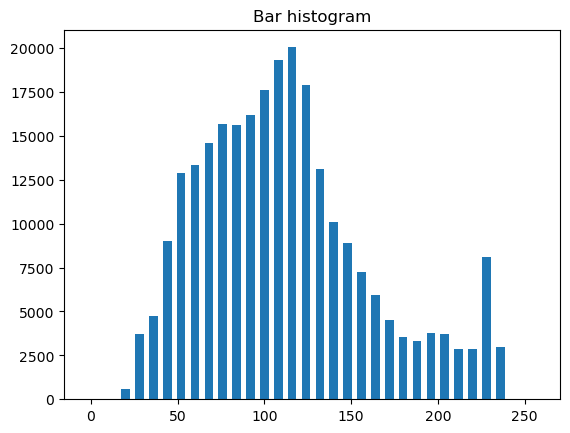

In [ ]:
hist = cv2.calcHist([goldhill], [0], None, [256], [0, 256])  # tính histogram của ảnh grayscale
plt.bar(intensity_values, hist[:, 0], width=5)  # vẽ histogram dạng cột
plt.title("Bar histogram")  # đặt tiêu đề biểu đồ
plt.show()  # hiển thị kết quả

The cameraman corresponds to the darker pixels, therefore we can set the Threshold in such a way as to segment the cameraman. In this case, it looks to be slightly less than 90, let’s give it a try:


In [ ]:
threshold = 87  # giá trị ngưỡng threshold
max_value = 255  # giá trị gán khi pixel lớn hơn ngưỡng
min_value = 0  # giá trị gán khi pixel nhỏ hơn hoặc bằng ngưỡng
new_image = thresholding(image, threshold=threshold, max_value=max_value, min_value=min_value)  # áp dụng thresholding cho ảnh

We see the pixels corresponding to the cameraman are now zero and the rest are set to 255:


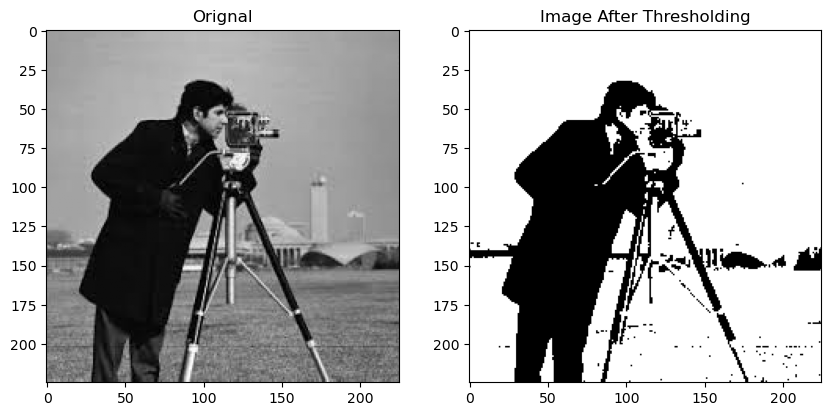

In [ ]:
plot_image(image, new_image, "Orignal", "Image After Thresholding")  # hiển thị ảnh gốc và ảnh sau thresholding

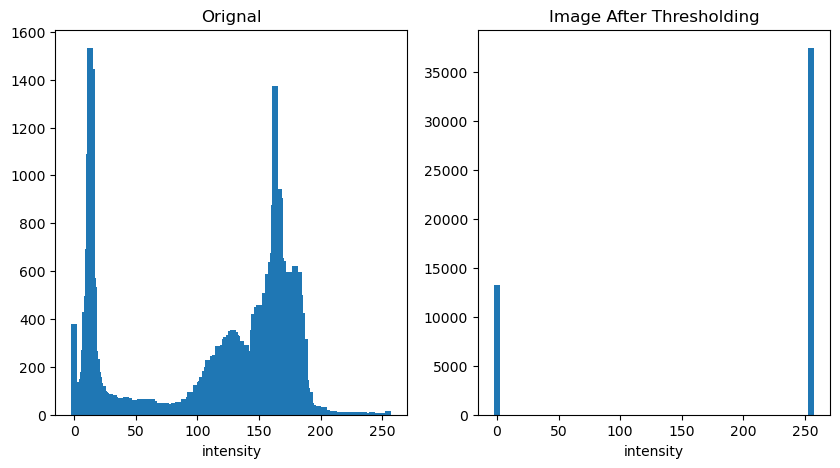

In [41]:
plt.figure(figsize=(10,5))
plot_hist(image, new_image, "Orignal", "Image After Thresholding")

The function <code>cv.threshold</code> Applies a threshold to the gray image, with the following parameters:


<code>cv.threshold(grayscale image, threshold value, maximum value to use, thresholding type )</code>


The  parameter thresholding type is the type of thresholding we would like to perform. For example, we have basic thresholding: <code>cv2.THRESH_BINARY</code> this is the type we implemented in the function <code>thresholding</code>, it just a number:


In [ ]:
cv2.THRESH_BINARY  # kiểu threshold nhị phân trong opencv

0

We can apply thresholding to the image as follows:


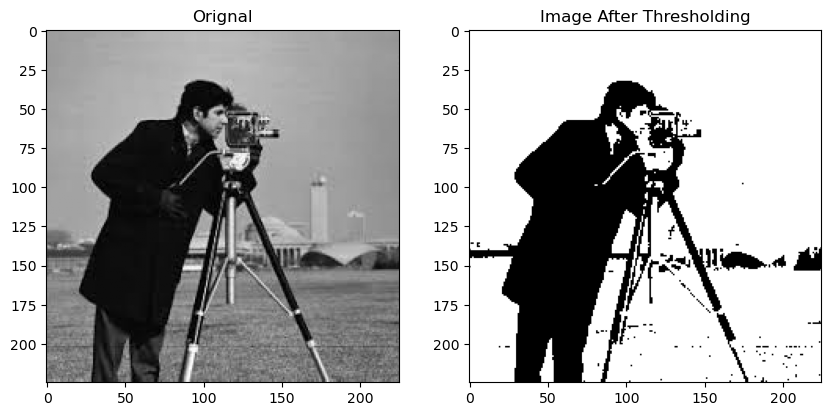

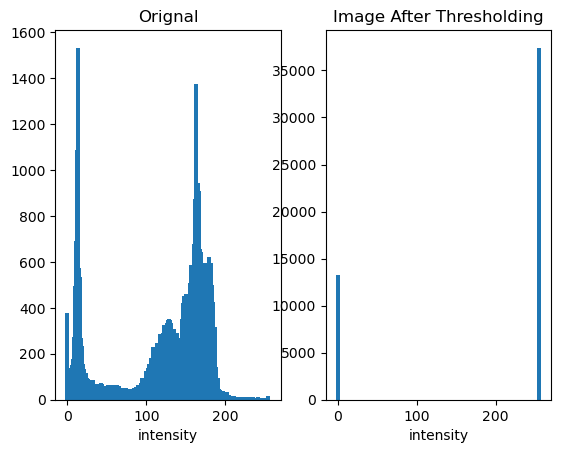

In [ ]:
ret, new_image = cv2.threshold(image, threshold, max_value, cv2.THRESH_BINARY)  # áp dụng threshold nhị phân bằng opencv
plot_image(image, new_image, "Orignal", "Image After Thresholding")  # hiển thị ảnh gốc và ảnh sau thresholding
plot_hist(image, new_image, "Orignal", "Image After Thresholding")  # vẽ histogram ảnh gốc và ảnh sau thresholding

<code>ret</code> is the threshold value and <code>new_image</code> is the image after thresholding has been applied. There are different threshold types, for example, cv2.THRESH_TRUNC will not change the values if the pixels are less than the threshold value:


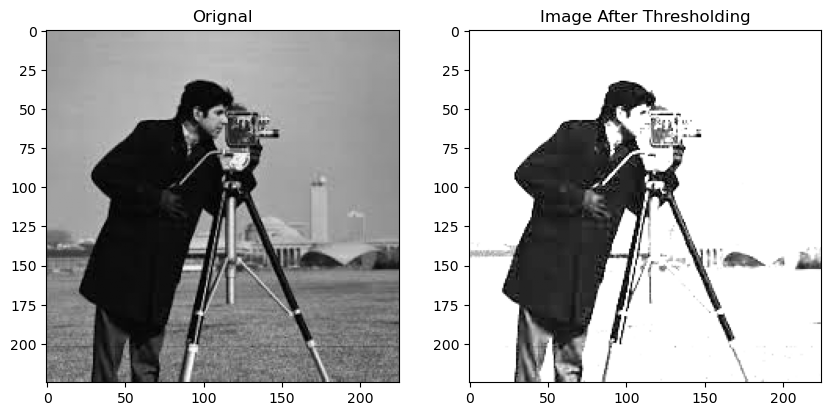

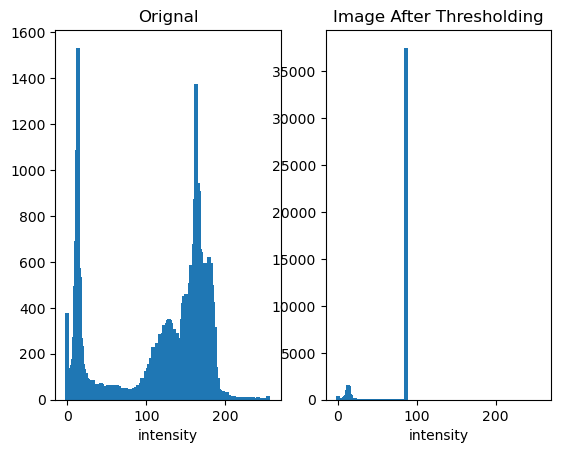

In [ ]:
ret, new_image = cv2.threshold(image, 86, 255, cv2.THRESH_TRUNC)  # áp dụng threshold truncation bằng opencv
plot_image(image, new_image, "Orignal", "Image After Thresholding")  # hiển thị ảnh gốc và ảnh sau thresholding
plot_hist(image, new_image, "Orignal", "Image After Thresholding")  # vẽ histogram ảnh gốc và ảnh sau thresholding

We see that the darker elements have not changed and the lighter values are set to 255.


 Otsu's method <code>cv2.THRESH_OTSU</code> avoids having to choose a value and determines it automatically, using the histogram.


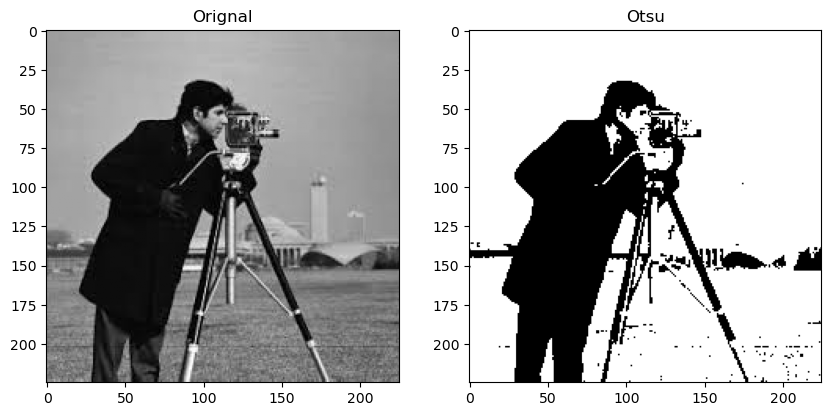

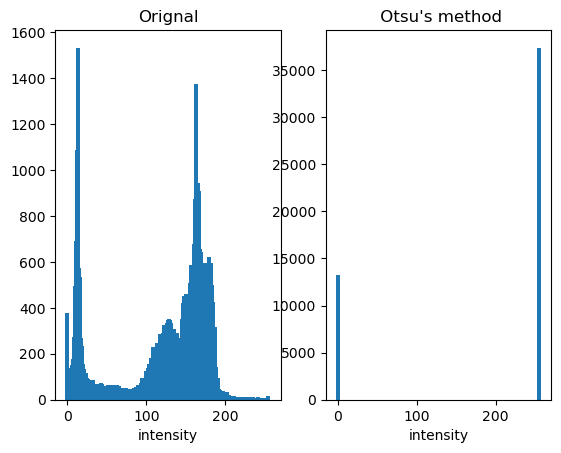

In [ ]:
ret, otsu = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)  # áp dụng threshold tự động bằng phương pháp otsu
plot_image(image, otsu, "Orignal", "Otsu")  # hiển thị ảnh gốc và ảnh sau otsu
plot_hist(image, otsu, "Orignal", " Otsu's method")  # vẽ histogram ảnh gốc và ảnh sau otsu

We assign the first row of pixels of the original array to the new array's last row. We repeat the process for every row, incrementing the row number for the original array and decreasing the new array's row index assigning the pixels accordingly.


In [ ]:
ret  # giá trị ngưỡng được otsu tự động tính ra

88.0

# References 


[1]  Images were taken from: https://homepages.cae.wisc.edu/~ece533/images/
    
[2]  <a href='https://pillow.readthedocs.io/en/stable/index.html'>Pillow Docs</a>

[3]  <a href='https://opencv.org/'>Open CV</a>

[4] Gonzalez, Rafael C., and Richard E. Woods. "Digital image processing." (2017).

[5 ] Jian, Wushuai, Xueyan Sun, and Shuqian Luo. "Computer-aided diagnosis of breast microcalcifications based on dual-tree complex wavelet transform." Biomedical engineering online 11.1 (2012): 1-12.


<!--<h2>Change Log</h2>-->


<!--<table>
    <tr>
        <th>Date (YYYY-MM-DD)</th>
        <th>Version</th>
        <th>Changed By</th>
        <th>Change Description</th>
    </tr>
    <tr>
        <td>2020-07-20</td>
        <td>0.2</td>
        <td>Azim</td>
        <td>Modified Multiple Areas</td>
    </tr>
    <tr>
        <td>2020-07-17</td>
        <td>0.1</td>
        <td>Azim</td>
        <td>Created Lab Template</td>
    </tr>
</table>
-->
